<a href="https://colab.research.google.com/github/raghavendrapon/CodeAlpha_ProjectName/blob/main/Heart_Disease_Dediction_using_Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# print heading - for display purposes only
def print_heading(heading):
    print('-' * 50)
    print(heading)
    print('-' * 50)

In [ ]:
# read data
df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Check the shape of the data
df.shape
print_heading('Shape of the data')
print(f"There are {df.shape[0]} patients and {df.shape[1]} features in the dataset.")

--------------------------------------------------
Shape of the data
--------------------------------------------------
There are 920 patients and 16 features in the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
print_heading("DATASET INFORMATION SUMMARY")

print("1. The dataset contains 920 entries across 16 features pertinent to heart disease studies.")
print("2. Complete data is available for 'id', 'age', 'sex', 'dataset', 'cp', and the outcome variable 'num'.")
print("3. Significant missing data is found in 'ca' with 66.41% missing.")
print("4. Significant missing data is found in 'thal' with 52.83% missing.")
print("5. 'Slope' also has a considerable amount of missing data, with only 611 non-null entries.")
print("6. Variables 'trestbps', 'chol', 'fbs', 'thalch', 'exang', and 'oldpeak' have some missing values but to a lesser extent.")

--------------------------------------------------
DATASET INFORMATION SUMMARY
--------------------------------------------------
1. The dataset contains 920 entries across 16 features pertinent to heart disease studies.
2. Complete data is available for 'id', 'age', 'sex', 'dataset', 'cp', and the outcome variable 'num'.
3. Significant missing data is found in 'ca' with 66.41% missing.
4. Significant missing data is found in 'thal' with 52.83% missing.
5. 'Slope' also has a considerable amount of missing data, with only 611 non-null entries.
6. Variables 'trestbps', 'chol', 'fbs', 'thalch', 'exang', and 'oldpeak' have some missing values but to a lesser extent.


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#Summary statistics


In [ ]:
print_heading('Observations from summary statistics'.upper())

print(f"1. There are no heart diseases found in the 25% of the patients with an average of age {df.describe().loc['25%', 'age']}.")
print(f"2. There is mild presence of heart diseases found in the 50% of the patients with an average of age {df.describe().loc['50%', 'age']}.")
print(f"3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age {df.describe().loc['75%', 'age']} or more.")

--------------------------------------------------
OBSERVATIONS FROM SUMMARY STATISTICS
--------------------------------------------------
1. There are no heart diseases found in the 25% of the patients with an average of age 47.0.
2. There is mild presence of heart diseases found in the 50% of the patients with an average of age 54.0.
3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age 60.0 or more.


#Observations from the summary statistics

In [ ]:
print_heading('Observations from summary statistics'.upper())

print(f"1. There are no heart diseases found in the 25% of the patients with an average of age {df.describe().loc['25%', 'age']}.")
print(f"2. There is mild presence of heart diseases found in the 50% of the patients with an average of age {df.describe().loc['50%', 'age']}.")
print(f"3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age {df.describe().loc['75%', 'age']} or more.")

--------------------------------------------------
OBSERVATIONS FROM SUMMARY STATISTICS
--------------------------------------------------
1. There are no heart diseases found in the 25% of the patients with an average of age 47.0.
2. There is mild presence of heart diseases found in the 50% of the patients with an average of age 54.0.
3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age 60.0 or more.


#Missing values

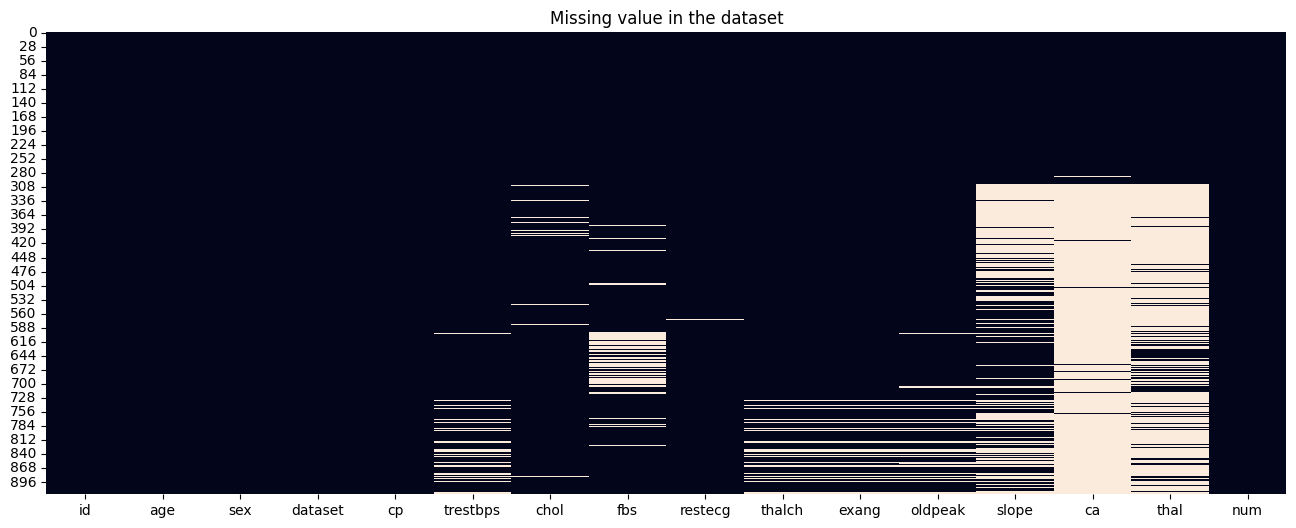

In [ ]:
# Plot the heatmap on dataset to check the missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing value in the dataset')
plt.show()

In [ ]:
round(((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False),2)

,0
ca,66.41
thal,52.83
slope,33.59
fbs,9.78
oldpeak,6.74
trestbps,6.41
exang,5.98
thalch,5.98
chol,3.26
restecg,0.22


In [ ]:
print_heading('Observations from missing values'.upper())

print("1. The dataset shows significant gaps in key features, with 'ca' and 'thal' being the most affected, missing 66.41% and 52.83% of their data, respectively.\n"
      "2. 'Slope' also has a substantial 33.59% of values missing.\n"
      "3. These high levels of incompleteness are likely to pose challenges for any predictive analysis.\n"
      "4. Advanced imputation techniques may be necessary to address the deficiencies before any reliable model training can be conducted.")

--------------------------------------------------
OBSERVATIONS FROM MISSING VALUES
--------------------------------------------------
1. The dataset shows significant gaps in key features, with 'ca' and 'thal' being the most affected, missing 66.41% and 52.83% of their data, respectively.
2. 'Slope' also has a substantial 33.59% of values missing.
3. These high levels of incompleteness are likely to pose challenges for any predictive analysis.
4. Advanced imputation techniques may be necessary to address the deficiencies before any reliable model training can be conducted.


#Applying the SimpleImputer method to handle smaller percentages of missing values

In [ ]:
# Automatically find numerical and categorical columns with missing values less than 10%
missing_threshold = 10  # 10% threshold for missing values
total_entries = len(df)
target_variable = 'num'

# list of numerical columns that have less than a certain threshold of missing values and are not the target variable.
numerical_cols = [
    col
    for col in df.columns
    if (
        (df[col].dtype in ['int64', 'float64']) and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold and
        col != target_variable
    )
]

# list of numerical columns that have less than a certain threshold of missing values
categorical_cols = [col
                   for col in df.columns
                   if (
                        df[col].dtype == 'object') and
                        (df[col].isnull().sum() / total_entries * 100) < missing_threshold]

# Apply simple imputation to numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numerical and categorical columns
for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])

print_heading('Observations from missing values after imputation'.upper())

# Confirm there are no missing values left

missing_values_sum = df[df.columns.difference(['thal', 'ca', 'slope'])].isnull().sum()

print(f"The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:\n{missing_values_sum}"  + "\n")
print_heading('High missing values features'.upper())

# Display the features with missing values
print(f"The sum of all high missing values where simple imputation wasn't used, is:\n{df[['thal', 'ca', 'slope']].isnull().sum()}")

--------------------------------------------------
OBSERVATIONS FROM MISSING VALUES AFTER IMPUTATION
--------------------------------------------------
The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:
age         0
chol        0
cp          0
dataset     0
exang       0
fbs         0
id          0
num         0
oldpeak     0
restecg     0
sex         0
thalch      0
trestbps    0
dtype: int64

--------------------------------------------------
HIGH MISSING VALUES FEATURES
--------------------------------------------------
The sum of all high missing values where simple imputation wasn't used, is:
thal     486
ca       611
slope    309
dtype: int64


#Heatmap for missing values

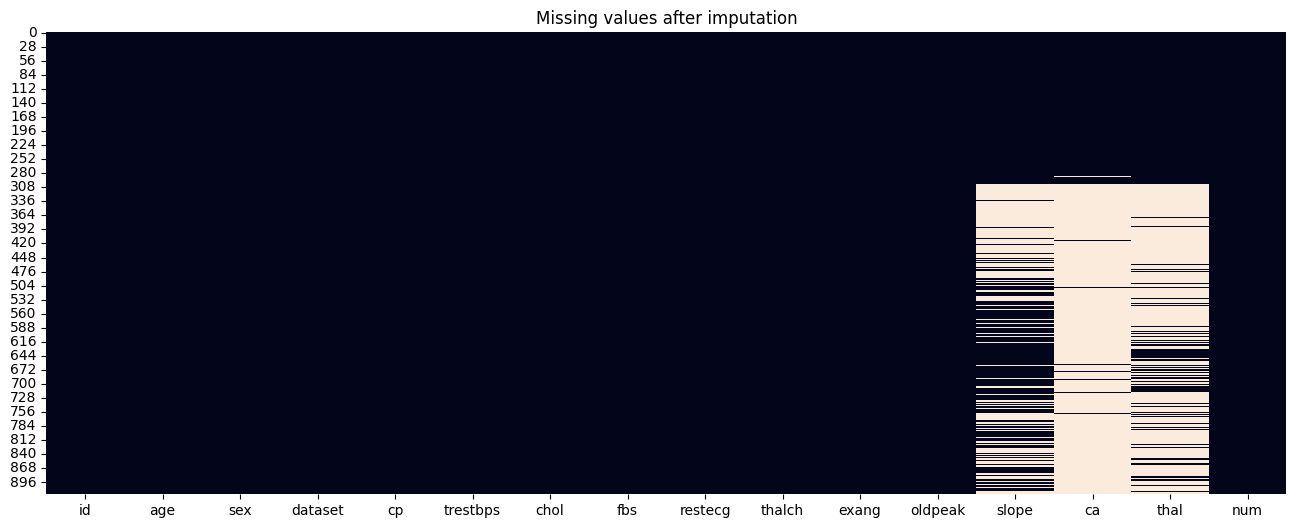

In [ ]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

**Observation**

Currently, only three variables remain with a substantial proportion of missing values. To address this, I will employ the Random Forest algorithm to estimate the missing data. By training a model specifically for this purpose, I aim to predict the missing entries that exhibit high rates of absence. Once predictions are made, I will integrate these estimations back into the DataFrame to complete the imputation process.

Strategy

I plan to tackle the imputation of missing values in features that have a significant amount of data missing by leveraging the Random Forest algorithm. My strategy is to divide the dataset into two subsets: the first will consist of records without missing values, and the second will contain the instances with missing values in the pertinent features. I will utilize the first subset to train the Random Forest model. Once the model is adequately trained, I will apply it to the second subset, which has the missing values, to predict those values. Finally, I will merge these predictions back into the original dataset, thereby replacing the missing entries with the imputed values.

Here are the steps:

1.Separate the Data: Split your dataset into two subsets:


*   Subset A: Rows without any missing values in the high-missing-rate features.

*   Subset A: Rows without any missing values in the high-missing-rate features.

2.Train the Model: Use Subset A to train the Random Forest model. The features with complete data will be used as predictors, while the feature you're imputing will be the target variable.

3.Predict Missing Values: Apply the trained Random Forest model to Subset B to predict the missing values. Only use the rows with missing values for the prediction to fill in the gaps.

4.Impute the Data: Take the predictions for the missing values and use them to impute the missing data in Subset B. This step merges the predicted values back into the original dataset.

5.Recombine the Data: Concatenate Subset A and the now imputed Subset B to reconstruct the complete dataset with all the previously missing values imputed.

In [ ]:
# split the dataset into two subset with one contaning complete data and the other containing missing data for thal, ca, and slope. these dataset should still have all the columns in the result.
# create a new dataframe which removes all the rows that nan values
df_clean = df.dropna()

# create a new dataframe which contains all the rows that have nan values
df_missing = df[df.isna().any(axis=1)]

print_heading('Complete data with no missing values'.upper())
print(f"The shape of the complete dataframe is: {df_clean.shape}")
print("\n")
print_heading('Missing data with high missing values'.upper())
print(f"The shape of the dataframe with missing values is: {df_missing.shape}")

--------------------------------------------------
COMPLETE DATA WITH NO MISSING VALUES
--------------------------------------------------
The shape of the complete dataframe is: (299, 16)


--------------------------------------------------
MISSING DATA WITH HIGH MISSING VALUES
--------------------------------------------------
The shape of the dataframe with missing values is: (621, 16)


#Next step - Applying Random Forest Algorithm to train the mode

In [ ]:
# Training and evaluating the model for the target variables 'slope', 'thanl', and 'ca'.
def predict_and_evaluate(target_variable, drop_columns):
    # Drop specified columns from the DataFrame
    X = df_clean.drop(drop_columns, axis=1)

    # Select target variable(s)
    y = df_clean[target_variable]

    # Initialize LabelEncoder
    le = LabelEncoder()

    #le = OneHotEncoder()
    for col in X.columns:
        # If column is of object type
        if X[col].dtype == 'object':
            # Encode the column
            X[col] = le.fit_transform(X[col])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier
    model = RandomForestClassifier(n_estimators=10, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print heading
    print_heading(f'Model performance for {target_variable}'.upper())

    # Print accuracy score
    print(f"The accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")

    # Print classification report
    print(f"Classification report:\n {classification_report(y_test, y_pred)}")

    # Return the trained model
    return model

In [ ]:
# Train and evaluate a model for predicting the 'slope' feature, excluding 'slope', 'ca', and 'thal' from the input features.
rf_model_slope  = predict_and_evaluate('slope', ['slope', 'ca', 'thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR SLOPE
--------------------------------------------------
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



In [ ]:
# Train and evaluate a model for predicting the 'ca' feature, excluding 'ca', and 'thal' from the input features.
rf_model_ca = predict_and_evaluate('ca', [ 'ca', 'thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR CA
--------------------------------------------------
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



In [ ]:
# # Train and evaluate a model for predicting the 'thal' feature.
rf_model_thal = predict_and_evaluate('thal', ['thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR THAL
--------------------------------------------------
The accuracy of the model is: 0.7
Classification report:
                    precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



Next step - Predicting Missing Values with a Trained Model

In our data processing pipeline, we face a dataset, df_missing, with a significant number of missing values in the slope, ca, and thal columns. To address this, we undertake the following steps:

1.**Data Preparation**: We create a new DataFrame df_encoded_pred by dropping the columns with missing values (slope, ca, and thal) from df_missing. This step is crucial for preparing the data for prediction by removing the target variables that we aim to predict.

2.**Encoding and Prediction Function**: We define a function encode_and_predict to automate the encoding of categorical features and to use a trained model for predicting the missing values:


*   The function initializes a LabelEncoder for transforming categorical text data into a numerical format suitable for the model.
*   It iterates over each column in the provided DataFrame, applying the label encoder to columns of type object (categorical). Finally, it uses the input model to predict values for the specified target variable.

3.**Applying the Trained Model**: We call the encode_and_predict function, passing in the df_encoded_pred DataFrame, the name of the target variable slope, and the pre-trained model rf_models. These trained model is specifically applied to predict the high number of missing values in the 'slope', 'thal', and 'ca' column.

4.**Updating the Original Data**: After predicting the slope values, we update the corresponding column in the original df_missing DataFrame with the newly predicted values. This allows us to fill in the gaps in our original dataset.

#Predicting missing values for the slope of the peak exercise ST segment.

In [ ]:
# create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['slope', 'ca', 'thal'], axis=1)

# Encode categorical features and predict the missing values
def encode_and_predict(df, target_variable, model):

    # Initialize label encoder
    le = LabelEncoder()

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Check if the column is of type 'object' (categorical)
        if df[col].dtype == 'object':
            # encode the categorical data to integers
            df[col] = le.fit_transform(df[col])
    # Use the model to apply predictions and assign the predicted values to the target variable
    df[target_variable] = model.predict(df)

# Encode categorical features and predict the 'slope' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'slope', rf_model_slope)
# Update the 'slope' column in df_missing with the predicted values
df_missing.loc[:,'slope'] = df_encoded_pred['slope']

#Predicting missing values for ca - Number of major vessels (0-3) colored by fluoroscopy.

In [ ]:
# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['ca', 'thal'], axis=1)
# Encode categorical features and predict the 'ca' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'ca', rf_model_ca)
# Update the 'ca' column in df_missing with the predicted values
df_missing.loc[:, 'ca'] = df_encoded_pred['ca']

#Predicting missing values for thal - Thalassemia category.

In [ ]:
# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['thal'], axis=1)
# Encode categorical features and predict the 'thal' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'thal', rf_model_thal)
# Update the 'thal' column in df_missing with the predicted values
df_missing.loc[:, 'thal'] = df_encoded_pred['thal']

#Next step - Merging the datasets

In [ ]:
# merge df_clean and df_missing
df = pd.concat([df_clean, df_missing])

print_heading('Dataset shape inspect'.upper())
print(f"The shape of the dataset is: {df.shape[0]} rows and {df.shape[1]} columns.")

--------------------------------------------------
DATASET SHAPE INSPECT
--------------------------------------------------
The shape of the dataset is: 920 rows and 16 columns.


#Verification of the trained model

In [ ]:
# Display the missing values if any in the dataset for verification
print_heading('Missing values inspect'.upper())
if df.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

--------------------------------------------------
MISSING VALUES INSPECT
--------------------------------------------------
There are no missing values in the dataset.


#Heatmap for verifying that the dataset is clean.

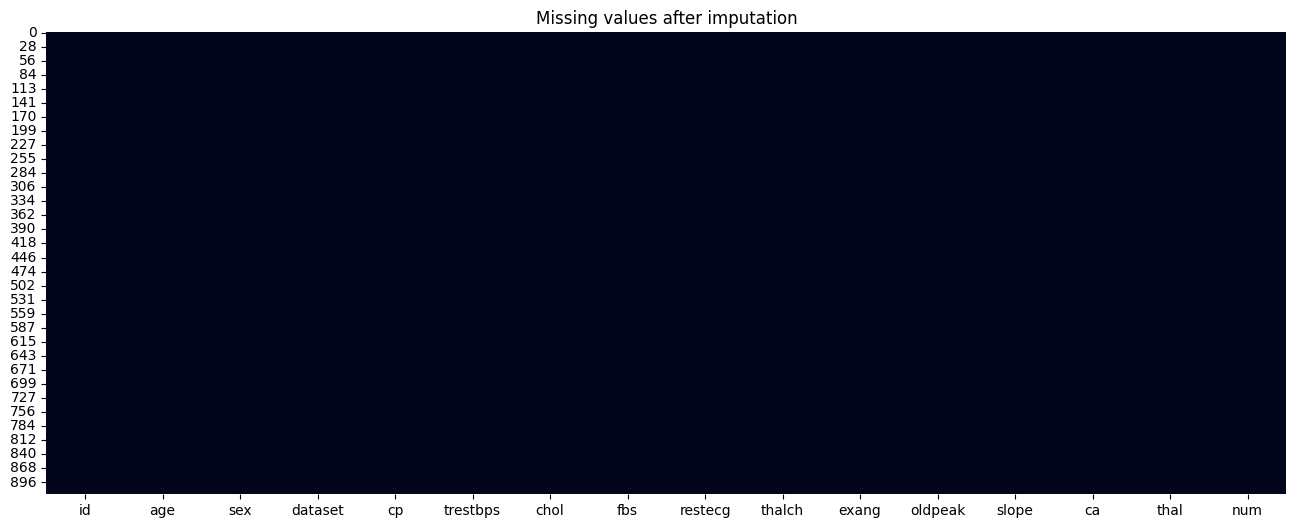

In [ ]:
# create a heatmap for df to check missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

Observations about the dataset:



*   The dataset is fully complete with no missing values in any of the columns.
*  All 16 columns, including 'id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', and 'num', have 0 missing values.

*   This completeness is an ideal scenario for conducting reliable statistical analyses or for input into machine learning models.
*  Having no missing values suggests that the data collection process was thorough and that the dataset has been well-prepared for further processing.

*   With a complete dataset, we can proceed with confidence in exploring the data, visualizing patterns, and drawing insights.














**Next step - Visualizing data distribution with Histogram and Boxplot**

To better understand the characteristics of our numerical features, I will create histograms and box plots for each of them. This visualization technique serves two primary purposes: first, it allows us to examine the data distribution, and second, it helps us identify potential outliers. Detecting outliers is crucial as they can significantly impact the performance of predictive models. Additionally, by observing the spread of the data, I can determine whether any scaling or transformation is necessary before training a model on the target variable 'num'. By ensuring our data is well-distributed and free of extreme values, I can improve the model's ability to learn and make accurate predictions.

In [ ]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#00FFFF"]):
    # Set to "dark" for a black background
    sns.set(style="dark", palette="deep")

    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color=cyan_palette[0])
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#000133')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=2.5,
                    flierprops=dict(markerfacecolor='w', marker='o', markeredgecolor='w', markersize=5),
                    whiskerprops=dict(color='white', linewidth=2.5),
                    capprops=dict(color='white', linewidth=2.5),
                    boxprops=dict(edgecolor='white', linewidth=2.5))
        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#000133')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

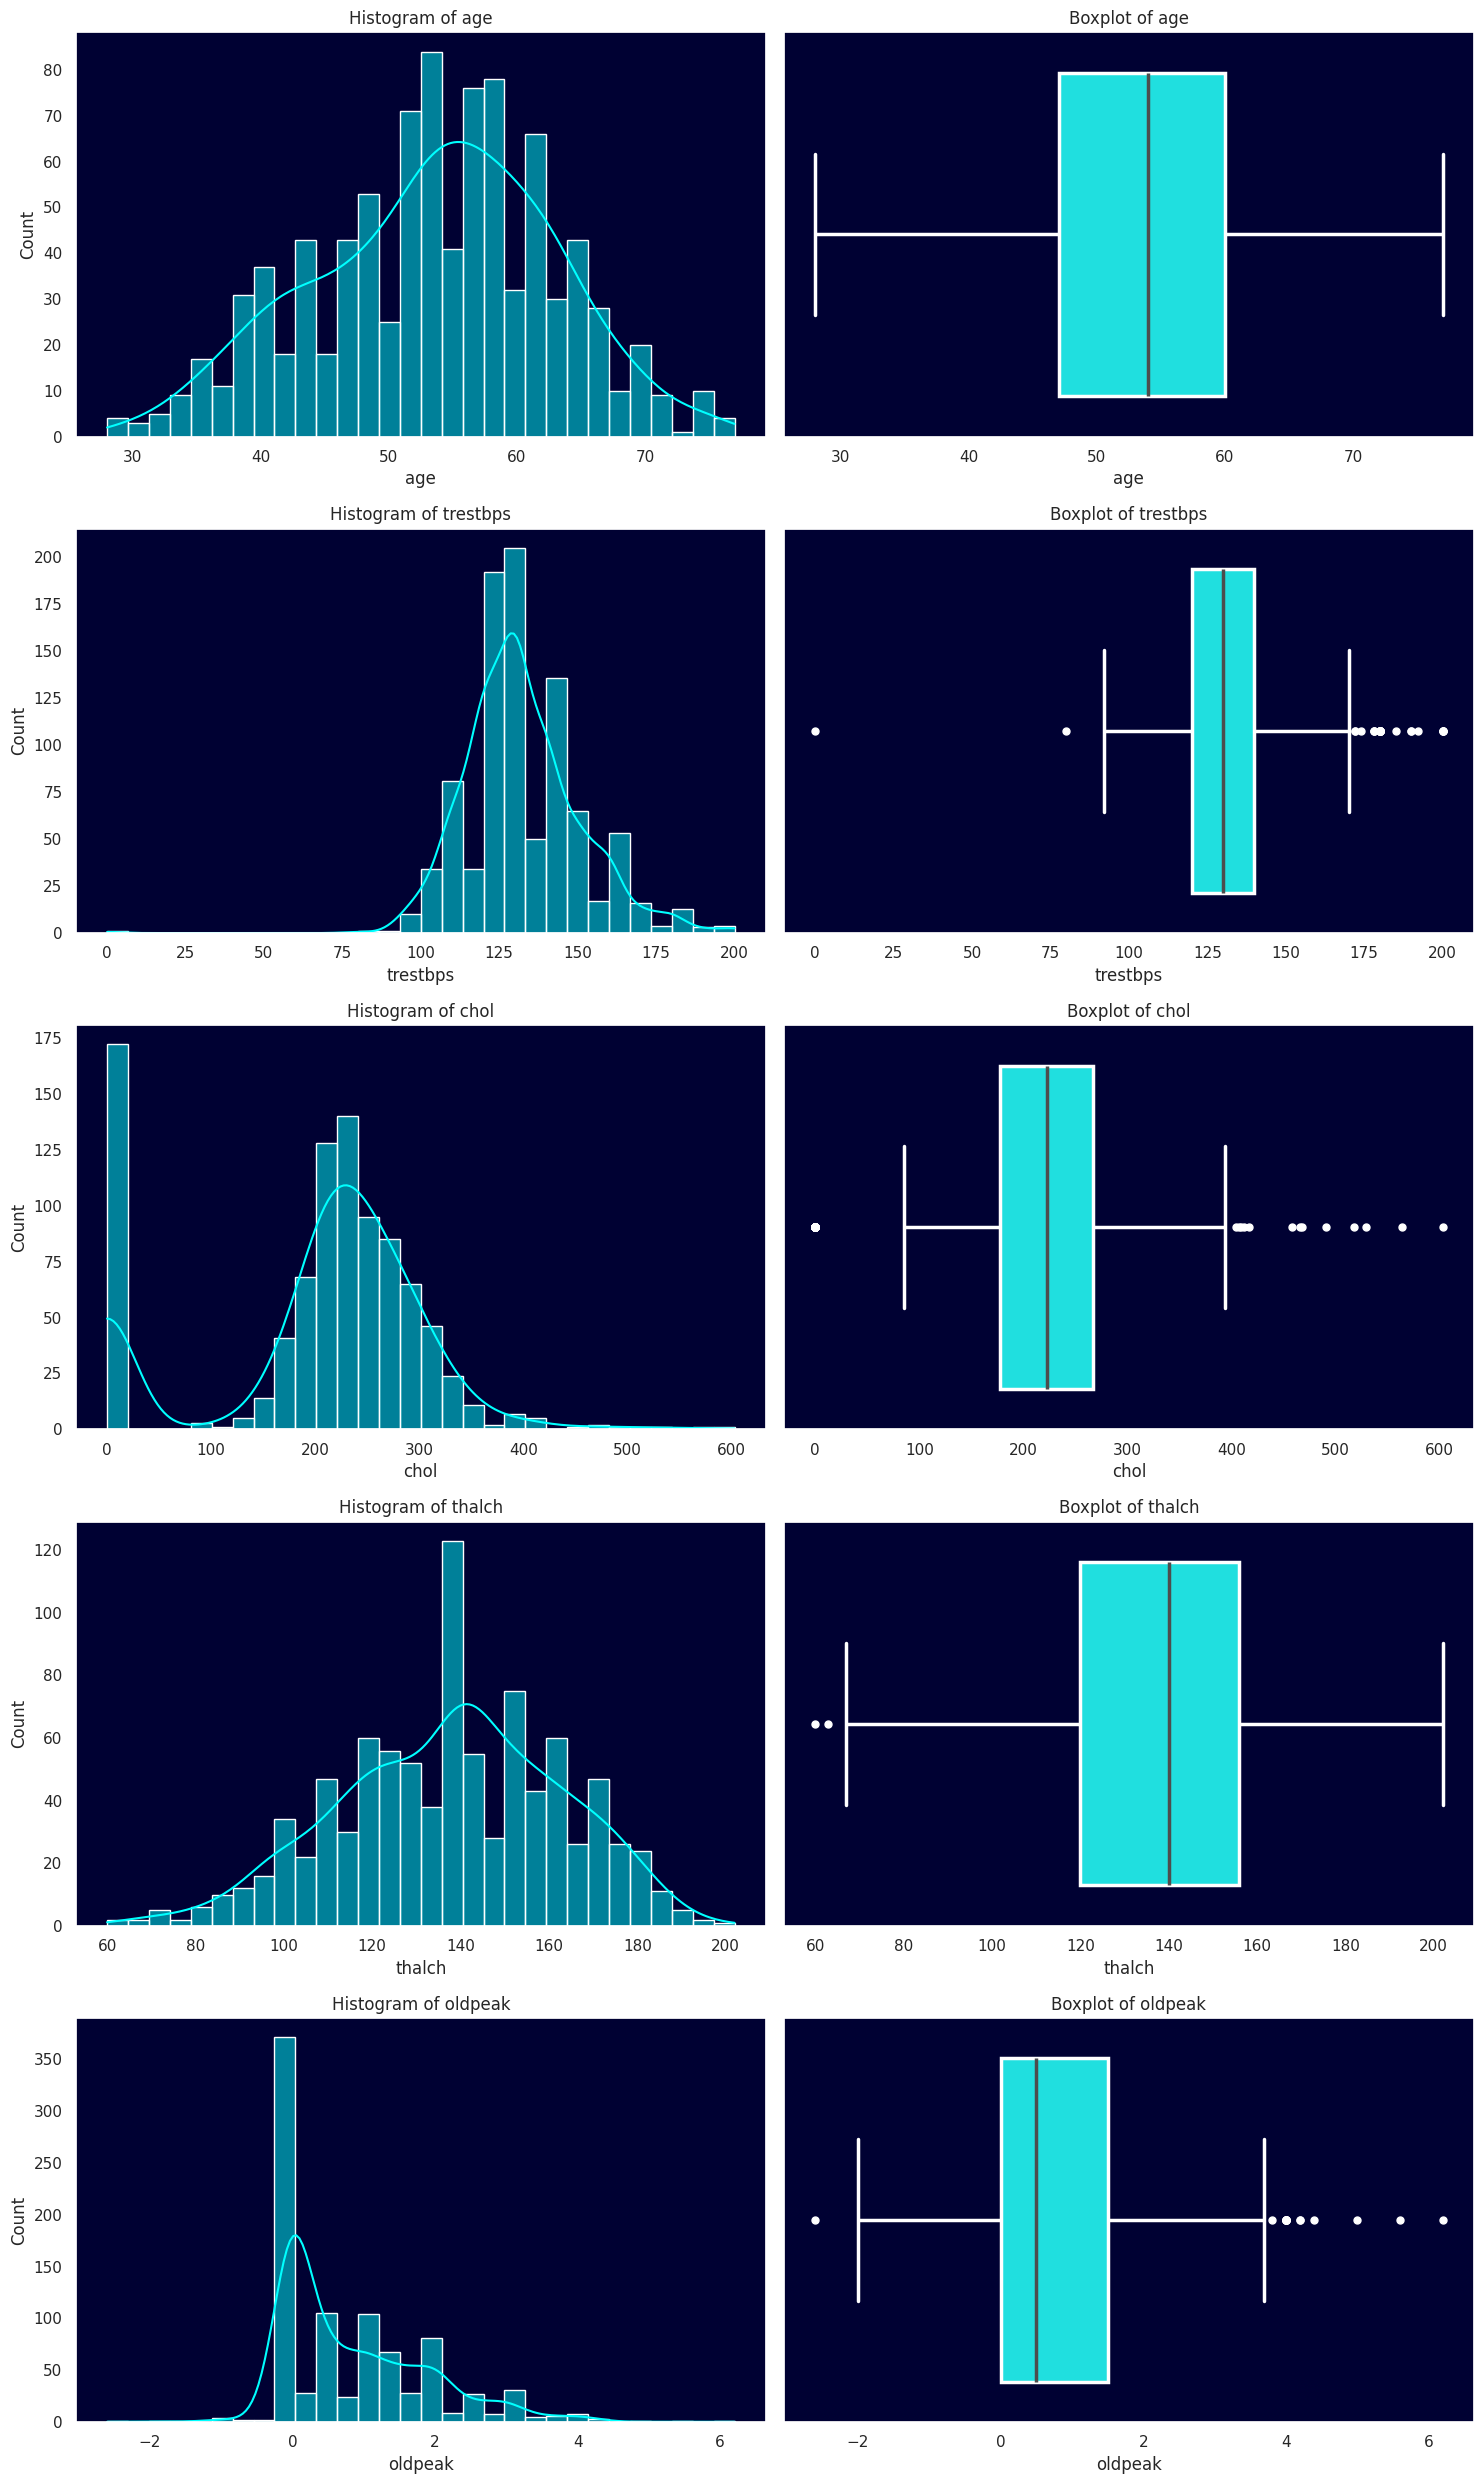

In [ ]:
# Remove id column from numerical_cols
numerical_cols.remove('id')
# Plot histogram and boxplot for numerical columns before scaling
plot_histogram_and_boxplot(df, numerical_cols)

**Next step - Normalizing Numerical Features with Quantile Transform**

To prepare the dataset for effective model training, I am employing a QuantileTransformer to normalize the numerical features. This transformation technique is designed to map the original data distribution to a normal distribution, which is particularly beneficial for algorithms that assume input data is normally distributed. The transformation is applied to each numerical column in the DataFrame, aiming to stabilize variance and minimize the influence of outliers.

In [ ]:
# Instantiate the QuantileTransformer with a normal output distribution and a fixed random state for reproducibility
quantile_transformer = QuantileTransformer(random_state=42, output_distribution='normal')

# Apply the transformer to the numerical columns of the DataFrame
df[numerical_cols] = quantile_transformer.fit_transform(df[numerical_cols])

Next step - Outlier Removal Using Interquartile Range

Outliers can significantly skew the results of a dataset, particularly in statistical analyses that assume a normal distribution of data. To address this, I've defined a function to detect and remove outliers within each numerical column of the DataFrame based on the Interquartile Range (IQR) method.

The function calculates the first (Q1) and third (Q3) quartiles, and the IQR (the difference between Q3 and Q1). It then determines the lower and upper bounds for acceptable data points. Values lying outside 1.5 times the IQR below Q1 or above Q3 are considered outliers and are removed from the dataset.

This cleaning process has been applied to each numerical column, with the exception of 'chol', which have been omitted from this outlier removal step. I will expain this in more in my next observation. By refining the dataset in this manner, we can potentially improve model accuracy, as the remaining data will be more representative of the underlying trend without the distortion from extreme values.

In [ ]:
# Calculate quantile ranges for each numerical column
def calc_lower_upper_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bound for outliers which is 1.5 times the IQR less than the first and third quartile
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

# Detect outliers based on the IQR
def detect_outliers(df, column):

    lower_bound, upper_bound = calc_lower_upper_bounds(df, column)
    # Detect outliers based on the lower and upper bounds
    outliers_detected = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    #calculate the percentage of outliers in the dataset
    outliers_percentage = round(len(outliers_detected) / df[column].shape[0] * 100, 2)
    print(f"Number of outliers detected in {column}: {outliers_percentage}%")

# Remove outliers based on the IQR
def remove_outliers(df, column):

    lower_bound, upper_bound = calc_lower_upper_bounds(df, column)
    # Remove outliers from the dataframe
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Disaplay heading
print_heading(f"percentages of outliers detected".upper())

# Detect and remove outliers for the numerical column
for col in numerical_cols:
    detect_outliers(df, col)
    # Only remove outliers for 'chol'
    if col in ['chol']:
        df = remove_outliers(df, col)

--------------------------------------------------
PERCENTAGES OF OUTLIERS DETECTED
--------------------------------------------------
Number of outliers detected in age: 0.87%
Number of outliers detected in trestbps: 1.3%
Number of outliers detected in chol: 19.13%
Number of outliers detected in thalch: 0.67%
Number of outliers detected in oldpeak: 0.27%


Observation from the outliers detection



*   Age: The outlier percentage is very low at 0.87%, indicating that age values are generally consistent with a typical distribution.

*   Trestbps: A slightly higher outlier percentage of 1.32% suggests minor deviations from the norm in resting blood pressure measurements.
*   Chol: The notably high outlier percentage of 19.11% in serum cholesterol levels indicates a substantial variation that could affect the dataset's overall analysis and model performance.

*  Thalach: With an outlier percentage of 0.41%, the maximum heart rate achieved by individuals is mostly within expected ranges.


*   Oldpeak: The extremely low outlier percentage of 0.28% for ST depression indicates a very uniform distribution with minimal extreme deviations.




Outlier Management Strategy for Dataset

Upon analyzing the dataset, I found a high percentage of outliers in the 'chol' feature (19.13%) that could skew results. Hence, I've decided to remove these outliers for a more reliable analysis. Other features also have outliers, but at a negligible rate (around 1%), which didn't affect model performance when retained. The following distribution graphs of these features will second my observations. My trials with models showed no improvement when these were removed. Therefore, I will keep these outliers, focusing only on 'chol' for outlier removal to balance data integrity with analytical precision.

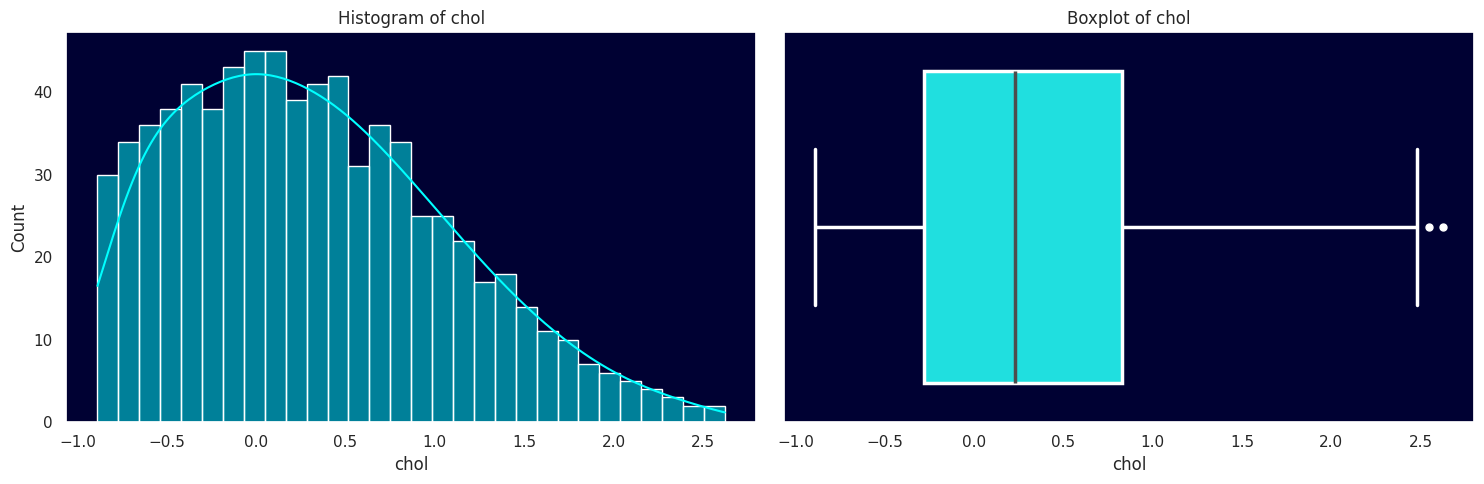

In [ ]:
# Plot histogram and boxplot for numerical columns after removing outliers
plot_histogram_and_boxplot(df, ['chol'])


Next step - Training and Evaluating a RandomForest Classifier on Heart Disease Data

In the next step, we are preparing a dataset for machine learning by first separating the features (X) from the target variable (y), which is 'num'. The features dataset is created by dropping the 'num' column from the DataFrame. We then encode categorical variables in the features to numerical values using LabelEncoder.

With the data prepared, we split it into training and testing sets, ensuring that we can both train and validate our model's performance. A RandomForestClassifier model is initialized and then trained using the training set (X_train, y_train).

After training, we use the model to make predictions on the test set (X_test). The predictions are then evaluated against the actual target values in y_test using a confusion matrix and classification metrics, providing us with a quantitative assessment of the model's accuracy and performance. Thus, we are both training and predicting the outcome for the target variable 'num' using a RandomForestClassifier.

In [ ]:
# Drop the target column 'num' from the DataFrame to create the features dataset
X = df.drop('num', axis=1)

# Create the target dataset
y = df['num']

# Initialize LabelEncoder
le = LabelEncoder()
for col in X.columns:
    # If column is of object type
    if X[col].dtype == 'object':
        # Encode the column to convert categorical variables into numerical
        X[col] = le.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the testing data
y_pred = rf_model.predict(X_test)

# Compute the confusion matrix to evaluate the accuracy of a classification
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix, accuracy of the model and the classification report
print_heading('Model performance'.upper())
print(f"The confusion matrix is:\n {confusion_matrix(y_test, y_pred)}")
print(f"\nThe accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")
print(f"Classification report:\n {classification_report(y_test, y_pred)}")

--------------------------------------------------
MODEL PERFORMANCE
--------------------------------------------------
The confusion matrix is:
 [[78 10  0  0  0]
 [ 8 24  2  5  0]
 [ 0  3  7  0  0]
 [ 3  2  1  4  0]
 [ 0  0  1  1  0]]

The accuracy of the model is: 0.76
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        88
           1       0.62      0.62      0.62        39
           2       0.64      0.70      0.67        10
           3       0.40      0.40      0.40        10
           4       0.00      0.00      0.00         2

    accuracy                           0.76       149
   macro avg       0.51      0.52      0.51       149
weighted avg       0.75      0.76      0.75       149



#Confusion matrix on trained model

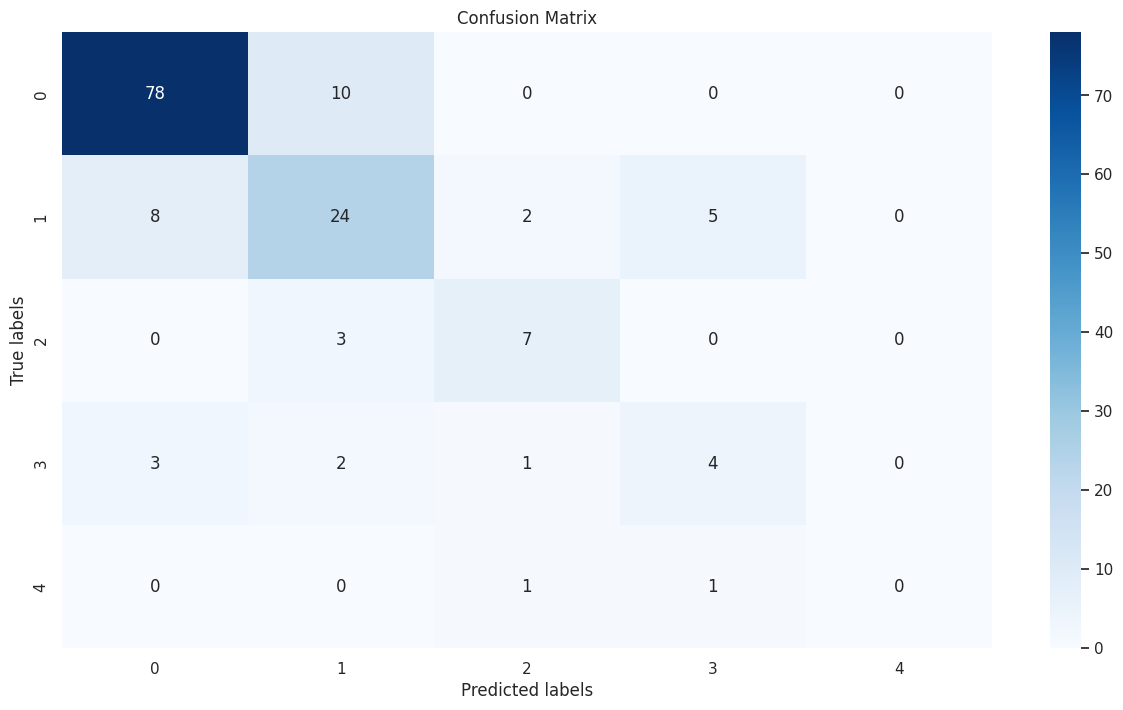

In [ ]:
# Create a heatmap from the confusion matrix
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Adding labels to the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Observations - Evaluation of Model Performance¶

1.**Overall Accuracy**: The model achieves an accuracy of 76%, which indicates it correctly predicts the target 76% of the time on the test dataset. This is a fairly good accuracy rate for many applications.

2.**Class 0 Performance**: The model shows high precision (88%) and recall (89%) for class 0, demonstrating its strong capability in correctly predicting this class.

3.**Class 1 Performance**: The precision (62%) and recall (62%) for class 1 are moderate, which suggests that the model's performance is acceptable for this class but there is noticeable room for improvement.

4.**Class 2 Performance**: The model exhibits a decent precision (64%) and a good recall (70%) for class 2, indicating that while it can reliably identify most of the true class 2 instances, there is a slight tendency to misclassify other classes as class 2.

5.**Class 3 Performance**: Class 3 shows equal precision and recall at 40%, which is relatively low and points to difficulties the model has in accurately classifying this class.

6.**Class 4 Performance**: The model is unable to classify class 4 correctly (precision and recall are 0%). This indicates a significant shortfall in the model's ability to recognize and predict instances of this class. This could be the result of influence of the magority classes

7.**F1-Score**: The F1-scores highlight the disparity in the model's performance across different classes, with class 0 at a high score and a stark drop for the remaining classes, particularly class 4.

8.**Confusion Matrix**: The confusion matrix reveals misclassifications, especially among classes 1, 2, and 3, hinting at possible confusion the model experiences with these classes.

9.**Macro and Weighted Averages**: The macro average (0.51) suggests that the model's average performance across classes is low, largely impacted by its inability to classify the minority classes accurately. The weighted average (0.75) is higher, reflecting the influence of the model's good performance on the majority class.

**Conclusion on Model Performance**

The model demonstrates strong performance in predicting the majority class (Class 0), but it struggles with minority classes, particularly Class 4, which it fails to predict correctly. While the overall accuracy appears acceptable, the low macro-average score reveals that the model lacks generalization across all classes. This indicates a significant class imbalance in the dataset. To enhance performance, especially on underrepresented classes, future work should include applying class-balancing techniques (e.g., oversampling, class weights), exploring more complex models, and fine-tuning hyperparameters. Additionally, advanced feature engineering may improve the model’s ability to distinguish between all classes effectively.